# Project 3. Design of fed-batch bioreactors

## Exercise 3

In some fermentations, the growth and product-formation steps to be separated, e.g., secondary metabolite, culture of genetically engineered cells.

Consider a system consisting of two reactors in serial. If the flowrate (F) is 100 L.h $^{-1}$, input substrate concentration is 10 g.L $^{-1}$ ($S_0$), max yield is 0.5, and Monod growth parameters are: $\mu_{max}$ = 1 h $^{-1}$ and $K_S$ = 0.75 g.L $^{-1}$, predict the outlet concentrations of the cell and substrate plus specific growth rate under following assumptions:

System is operating under steady state conditions.\
You can neglect the maintenance energy of the cells. 

In [471]:
F = 100 #L/h
S0 = 10 #g/L
Y_XS = 0.5
mumax = 1 #/h
Ks = 0.75 #g/L

For the first reactor, the feed is sterile, thus the equation found in project 2, exercise 4 hold:

* $\mu = D_1$

* $S_1 = D_1 \cdot \frac{K_s}{D_{max} - D_1}$

* $X_1 = Y_{X/S} \cdot (S_0 - S_1)$

For the second reactor, these equations don't hold anymore since the feed contain some cell at the concentration $X_1$. Starting form the mass balance for the cells in reactor 2:

* $0 = D_2 \cdot X_1 - D_2 \cdot X_2 + {r_X}_2$

Knowing that ${r_X}_2 = \mu_2 \cdot X_2$ and that $\mu_2 = \frac{\mu_{max} \cdot S_2}{K_S + S_2}$, the mass balance can be written:

* $0 = D_2 \cdot X_1 - D_2 \cdot X_2 + \frac{\mu_{max} \cdot S_2}{K_S + S_2} \cdot X_2$

Isolating $X_2$ gives:

* $X_2 = \frac{D_2 \cdot X_1 \cdot (K_S + S_2)}{D_2 \cdot (K_S + S_2) - S_2 \cdot \mu_{max}}$

Starting from the mass balance for the substrate in reactor 2:

* $0 = D_2 \cdot S_1 - D_2 \cdot S_2 + {r_S}_2$

Knowing that ${r_S}_2 = -\frac{{r_X}_2}{Y_{X/S}}$, this can be written as:

* $0 = D_2 \cdot S_1 - D_2 \cdot S_2 - \frac{\mu_{max} \cdot S_2}{Y_{X/S} \cdot (K_S + S_2)} \cdot X_2$

After substituing for $X_2$:

* $0 = D_2 \cdot S_1 - D_2 \cdot S_2 - \frac{\mu_{max} \cdot S_2 \cdot D_2 \cdot X_1}{Y_{X/S} \cdot (D_2 \cdot (K_S + S_2) - S_2 \cdot \mu_{max})}$

Which gives a second order equation when solving for $S_2$, where the coefficients are:

* $a = Y_{X/S} \cdot (\mu_{max} - D_2)$

* $b = Y_{X/S} \cdot (D_2 \cdot (S_1 - K_S) - S_1 \cdot \mu_{max}) - X_1 \cdot \mu_{max}$

* $c = Y_{X/S} \cdot K_S \cdot S_1 \cdot D_2$

Or:

$S_2 = \frac{Y_{X/S} \cdot (D_2 \cdot (K_S - S_1) + S_1 \cdot \mu_{max}) + X_1 \cdot \mu_{max} \pm \sqrt{(Y_{X/S} \cdot (D_2 \cdot (S_1 - K_S) - S_1 \cdot \mu_{max}) - X_1 \cdot \mu_{max})^2 - 4 \cdot Y_{X/S} \cdot (\mu_{max} - D_2) \cdot Y_{X/S} \cdot K_S \cdot S_1 \cdot D_2}}{2 \cdot Y_{X/S} \cdot (\mu_{max} - D_2)}$

In [472]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams.update({'font.size': 10})

def predict(V1, V2, display = True):

    if V1 == 0:
        V1 = 1e-9
    D1 = F/V1

    # If the dilution rate is bigger than the maximum specific growth
    # rate, then the specific growth rate is equal to the maximum
    # specific growth rate and the substrate concentration is equal to 
    # the substrate concentration in the feed
    if mumax - D1 <= 0:
        mu1 = mumax
        S1 = S0

    # If the dilution rate is smaller than the maximum specific growth
    # rate, then the specific growth rate is equal to the dilution rate
    # and the substrate concentration is calculated according to Monod's 
    # equation
    else:
        S1 = D1*Ks/(mumax - D1)
        mu1 = D1
        
        # If the substrate concentration calculated is bigger than the
        # substrate concentration in the feed, then fix the substrate
        # concentration to the substrate concentration in the feed
        if S1 > S0:
            S1 = S0
    
    # Then calculate the biomass concentration according to the 
    # substrate concentration
    X1 = Y_XS*(S0 - S1)

    # To model when the volume of the second reactor goes to 0
    if V2 == 0:
        V2 = 1e-9

    # If the biomass concentration in the first reactor is 0, then
    # the equations for the second reactor are the same as the first
    if X1 == 0:
        D2 = F/V2

        # If the dilution rate is bigger than the maximum specific
        # growth rate, then the specific growth rate is equal to the
        # maximum specific growth rate and the substrate  
        # concentration is equal to the substrate concentration in
        # the feed
        if mumax - D2 <= 0:
            mu2 = mumax
            S2 = S1

        # If the dilution rate is smaller than the maximum specific
        # growth rate, then the specific growth rate is equal to the
        # dilution rate and the substrate concentration is 
        # calculated according to Monod's equation
        else:
            S2 = D2*Ks/(mumax - D2)
            mu2 = D2
            
            # If the substrate concentration calculated is bigger
            # than the substrate concentration in the feed, then fix
            # the substrate concentration to the substrate 
            # concentration in the feed
            if S2 > S1:
                S2 = S1
        
        # Then calculate the biomass concentration according to the 
        # substrate concentration
        X2 = Y_XS*(S1 - S2)

    # If the biomass concentration in the first reactor is not 0, 
    # then the equations are different
    if X1 > 0:

        # The dilution rate is still the same
        D2 = F/V2

        # If the dilution rate is equal to the maximum specific
        # growth rate, then a division by zero error will occur when
        # calculating the substrate concentration, this is solved by
        # increasing slightly the value of the dilution rate
        if D2 == mumax:
            D2 = D2 + 1e-9

        # The substrate concentration is then calculated
        a = Y_XS*(mumax - D2)
        b = Y_XS*(D2*(S1 - Ks) - S1*mumax) - X1*mumax
        c = Y_XS*Ks*S1*D2
        S2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
        
        # If the substrate concentration calculated is bigger then
        # the substrate concentration in the feed, then fix the
        # substrate concentration to the substrate concentration in
        # the feed
        if S2 > S1:
            S2 = S1

        # The specific growth rate is the calculated according to
        # the Monod's equation (note that it is not equal to the 
        # dilution rate anymore)
        mu2 = mumax*S2/(Ks + S2)

        # If the specific growth rate calculated is bigger than the
        # maximum specific growth rate, then fix the specific growth
        # rate to the maximum specific growth rate
        if mu2 > mumax:
            mu2 = mumax

        # The biomass concentration is then calculated
        X2 = D2*X1*(Ks + S2)/(D2*(Ks + S2) - S2*mumax)

    if display:
        print(f"Specific growth rate in reactor 1: {round(mu1, 3)}")
        print(f"Concentration of substrate in reactor 1: {round(S1, 3)}")
        print(f"Concentration of biomass in reactor 1: {round(X1, 3)}")

    if V2 != 0:
        if display:
            print(f"Specific growth rate in reactor 2: {round(mu2, 3)}")
            print(f"Concentration of substrate in reactor 2: {round(S2, 3)}")
            print(f"Concentration of biomass in reactor 2: {round(X2, 3)}")
    else:
        mu2 = None
        S2 = None
        X2 = None

    return np.array([mu1, S1, X1, mu2, S2, X2])

### Question a)
**The working volume of the first reactor is 800 L and the second 200 L.**

In [473]:
qa = predict(800, 200)

Specific growth rate in reactor 1: 0.125
Concentration of substrate in reactor 1: 0.107
Concentration of biomass in reactor 1: 4.946
Specific growth rate in reactor 2: 0.005
Concentration of substrate in reactor 2: 0.004
Concentration of biomass in reactor 2: 4.998


### Question b)
**The working volume of the first reactor is 200 L and the second 800 L.**

In [474]:
qb = predict(200, 800)

Specific growth rate in reactor 1: 0.5
Concentration of substrate in reactor 1: 0.75
Concentration of biomass in reactor 1: 4.625
Specific growth rate in reactor 2: 0.009
Concentration of substrate in reactor 2: 0.007
Concentration of biomass in reactor 2: 4.996


### Question c)
**The working volume of the first reactor is 900 L and the second 100 L.**

In [475]:
qc = predict(900, 100)

Specific growth rate in reactor 1: 0.111
Concentration of substrate in reactor 1: 0.094
Concentration of biomass in reactor 1: 4.953
Specific growth rate in reactor 2: 0.009
Concentration of substrate in reactor 2: 0.007
Concentration of biomass in reactor 2: 4.997


### Question d)
**The working volume of the first reactor is 100 L and the second 900 L.**

In [476]:
qd = predict(100, 900)

Specific growth rate in reactor 1: 1
Concentration of substrate in reactor 1: 10
Concentration of biomass in reactor 1: 0.0
Specific growth rate in reactor 2: 0.111
Concentration of substrate in reactor 2: 0.094
Concentration of biomass in reactor 2: 4.953


### Question e)
**Compare the proposed configurations in terms of output cell and substrate concentrations.**\
**Compare the value predicted if a single 1000 L reactor was used.**

Specific growth rate in reactor 1: 0.1
Concentration of substrate in reactor 1: 0.083
Concentration of biomass in reactor 1: 4.958
Specific growth rate in reactor 2: 0.1
Concentration of substrate in reactor 2: 0.083
Concentration of biomass in reactor 2: 4.958


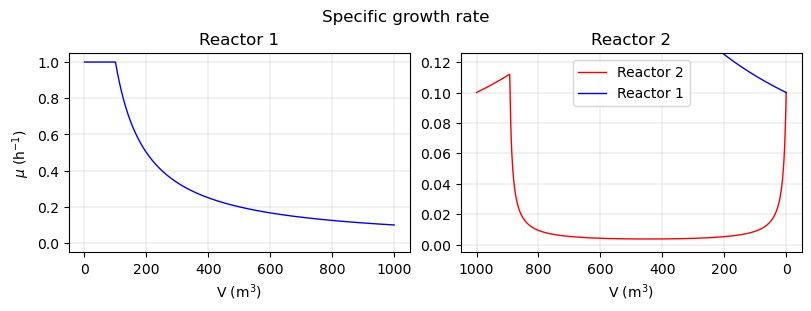

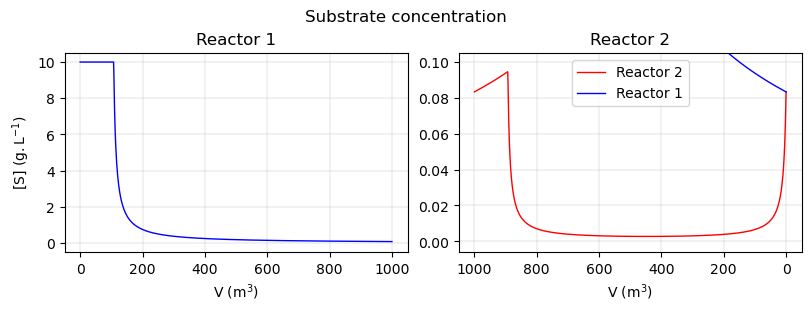

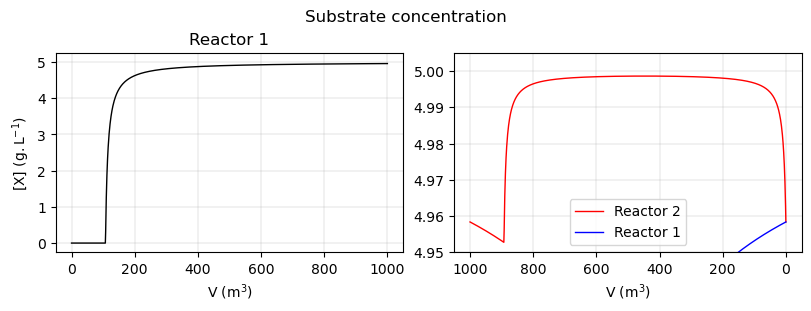

' plt.plot(V1, np.round(-100/V1*results[:, 2] + results[:, 0]*results[:, 2], 3))\nplt.show()\nplt.plot(V1, np.round(100/V1*S0 - 100/V1*results[:, 1] - results[:, 0]*results[:, 2]/Y_XS, 3))\nplt.show()\nplt.plot(V1, np.round(100/V2*results[:, 2] - 100/V2*results[:, 5] + results[:, 3]*results[:, 5], 3))\nplt.show()\nplt.plot(V1, np.round(100/V2*results[:, 1] - 100/V2*results[:, 4] - results[:, 3]*results[:, 5]/Y_XS, 3)) '

In [477]:
qe = predict(1000, 0)

V1 = np.linspace(0, 1000, 1001)
V2 = 1000 - V1
results = np.zeros((len(V1), 6))

for i in range(len(V1)):
    results[:][i] = predict(V1[i], V2[i], display = False)

fig, axs = plt.subplots(ncols = 2)
# Plot the first figure on the left
axs[0].plot(V1, results[:, 0], color = "blue")
axs[0].set_title("Reactor 1")
axs[0].set_xlabel(r"V ($\mathregular{m^3}$)")
axs[0].set_ylabel(r"$\mu$ ($\mathregular{h^{-1}}$)")
axs[0].set_ylim(-0.05, 1.05)
axs[0].grid(linewidth = 0.25)
# Plot the second figure on the right
axs[1].plot(1000 - V1, results[:, 3], color = "red", label = "Reactor 2")
axs[1].plot(1000 - V1, results[:, 0], color = "blue", label = "Reactor 1")
axs[1].legend()
axs[1].set_title("Reactor 2")
axs[1].set_xlabel(r"V ($\mathregular{m^3}$)")
axs[1].invert_xaxis()
axs[1].set_ylim(-0.005, 0.126)
axs[1].grid(linewidth = 0.25)
fig.suptitle("Specific growth rate")

# Saving plot in eps format
# plt.savefig("Images\\3.e.1.eps", format = "eps")

plt.show()

fig, axs = plt.subplots(ncols=2)
# Plot the first figure on the left
axs[0].plot(V1, results[:, 1], color = "blue")
axs[0].set_title("Reactor 1")
axs[0].set_xlabel(r"V ($\mathregular{m^3}$)")
axs[0].set_ylabel(r"[S] ($\mathregular{g.L^{-1}}$)")
axs[0].set_ylim(-0.5, 10.5)
axs[0].grid(linewidth = 0.25)
# Plot the second figure on the right
axs[1].plot(1000 - V1, results[:, 4], color = "red", label = "Reactor 2")
axs[1].plot(1000 - V1, results[:, 1], color = "blue", label = "Reactor 1")
axs[1].legend()
axs[1].set_title("Reactor 2")
axs[1].set_xlabel(r"V ($\mathregular{m^3}$)")
axs[1].invert_xaxis()
axs[1].set_ylim(-0.006, 0.105)
axs[1].grid(linewidth = 0.25)
fig.suptitle("Substrate concentration")

# Saving plot in eps format
# plt.savefig("Images\\3.e.2.eps", format = "eps")

plt.show()

fig, axs = plt.subplots(ncols=2)
# Plot the first figure on the left
axs[0].plot(V1, results[:, 2], color = "blue")
axs[0].set_title("Reactor 1")
axs[0].set_xlabel(r"V ($\mathregular{m^3}$)")
axs[0].set_ylabel(r"[X] ($\mathregular{g.L^{-1}}$)")
axs[0].set_ylim(-0.25, 5.25)
axs[0].grid(linewidth = 0.25)
# Plot the second figure on the right
axs[1].plot(1000 - V1, results[:, 5], color = "red", label = "Reactor 2")
axs[1].plot(1000 - V1, results[:, 2], color = "blue", label = "Reactor 1")
axs[1].legend()
axs[1].set_xlabel(r"V ($\mathregular{m^3}$)")
axs[1].invert_xaxis()
axs[1].set_ylim(4.95, 5.005)
axs[1].grid(linewidth = 0.25)
fig.suptitle("Substrate concentration")

# Saving plot in eps format
# plt.savefig("Images\\3.e.3.eps", format = "eps")

plt.show()

""" plt.plot(V1, np.round(-100/V1*results[:, 2] + results[:, 0]*results[:, 2], 3))
plt.show()
plt.plot(V1, np.round(100/V1*S0 - 100/V1*results[:, 1] - results[:, 0]*results[:, 2]/Y_XS, 3))
plt.show()
plt.plot(V1, np.round(100/V2*results[:, 2] - 100/V2*results[:, 5] + results[:, 3]*results[:, 5], 3))
plt.show()
plt.plot(V1, np.round(100/V2*results[:, 1] - 100/V2*results[:, 4] - results[:, 3]*results[:, 5]/Y_XS, 3)) """